<a href="https://colab.research.google.com/github/eashwarydubey/machine-learning/blob/main/Basic_Object_Detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

- **Business Problem** : Using object detection detect pan and aadhar .
This is a bounding box problem/ Image segmentation problem and classification .

**Used very simple approach.**
- Convert image to grayscale and Gaussian blur image
- Perform canny edge detection
- Dilate image to form a larger contour
- Iterate through contours and find bounding boxes
- Extract ROI and save image

This can be modified in future using state of the art segmentation problem , but i have used only basic methods.


After bounding box , i have selected top 2 largest region of intrest as those will be bounding box of pan and aadhar. Other Region of intrest are small and I want whole aadhar and pan so neglecting those ROI .

**Libries Used:**
opencv
fastai

opencv is used for bounding box detection
fasi ai is used for classification

**Scope of improvement :**
opencv , a model can be trained on ovencv itself for classification which will direct seperate image of pan and aadhar . 

**Limitation :**
- Small training dataset
- Computaion power


In [1]:
import cv2
import numpy as np
from google.colab.patches import cv2_imshow

In [67]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
!ls /content/drive/MyDrive/dataset/Input.jpg

/content/drive/MyDrive/dataset/Input.jpg


image2.png contains both pan and aadhar .

In [4]:
sample = cv2.imread("/content/drive/MyDrive/dataset/image2.png")

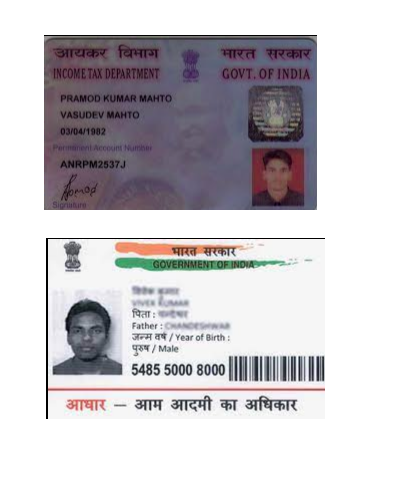

In [5]:
cv2_imshow(sample)

Region of intrest {} [[[112 402]]

 [[112 408]]

 [[128 408]]

 [[128 402]]]


Region of intrest {} [[[217 397]]

 [[217 403]]

 [[218 404]]

 [[218 408]]

 [[219 409]]

 [[220 409]]

 [[221 410]]

 [[222 410]]

 [[223 411]]

 [[223 412]]

 [[229 412]]

 [[230 411]]

 [[231 412]]

 [[237 412]]

 [[237 405]]

 [[239 403]]

 [[239 397]]]


Region of intrest {} [[[133 397]]

 [[133 409]]

 [[135 411]]

 [[141 411]]

 [[142 412]]

 [[153 412]]

 [[153 410]]

 [[154 409]]

 [[155 409]]

 [[156 410]]

 [[156 411]]

 [[157 412]]

 [[161 412]]

 [[162 411]]

 [[163 411]]

 [[163 404]]

 [[164 403]]

 [[164 397]]]


Region of intrest {} [[[ 65 397]]

 [[ 65 401]]

 [[ 64 402]]

 [[ 64 409]]

 [[ 65 410]]

 [[ 66 410]]

 [[ 67 411]]

 [[ 72 411]]

 [[ 73 412]]

 [[ 84 412]]

 [[ 84 411]]

 [[ 85 410]]

 [[ 87 410]]

 [[ 88 411]]

 [[ 88 412]]

 [[107 412]]

 [[107 406]]

 [[106 405]]

 [[106 404]]

 [[107 403]]

 [[107 397]]]


Region of intrest {} [[[227 353]]

 [[227 355]]

 [[226 356]]

 [[226 361]]

 [[225 362]]

 [[223 362]]

 [[222 361]]

 [[218 361]]

 [[217 362]]

 [[203 362]]

 [[202 361]]

 [[198 361]]

 [[197 362]]

 [[195 362]]

 [[195 363]]

 [[194 364]]

 [[193 363]]

 [[193 362]]

 [[177 362]]

 [[176 361]]

 [[165 361]]

 [[164 362]]

 [[163 362]]

 [[163 363]]

 [[162 364]]

 [[161 363]]

 [[161 361]]

 [[131 361]]

 [[130 362]]

 [[130 368]]

 [[129 369]]

 [[129 375]]

 [[131 377]]

 [[138 377]]

 [[139 376]]

 [[140 377]]

 [[160 377]]

 [[161 376]]

 [[162 376]]

 [[163 377]]

 [[192 377]]

 [[193 376]]

 [[193 375]]

 [[194 374]]

 [[195 375]]

 [[195 376]]

 [[196 377]]

 [[225 377]]

 [[226 378]]

 [[226 380]]

 [[227 381]]

 [[227 383]]

 [[235 383]]

 [[236 382]]

 [[240 382]]

 [[241 383]]

 [[245 383]]

 [[246 382]]

 [[247 382]]

 [[248 383]]

 [[258 383]]

 [[259 382]]

 [[264 382]]

 [[265 383]]

 [[269 383]]

 [[270 382]]

 [[273 382]]

 [[274 383]]

 [[280 383]]

 [[281 382]]


Region of intrest {} [[[130 284]]

 [[130 294]]

 [[132 296]]

 [[152 296]]

 [[153 295]]

 [[154 295]]

 [[155 294]]

 [[156 295]]

 [[156 307]]

 [[157 307]]

 [[158 308]]

 [[157 309]]

 [[156 309]]

 [[156 317]]

 [[157 318]]

 [[159 318]]

 [[160 319]]

 [[169 319]]

 [[171 321]]

 [[170 322]]

 [[169 322]]

 [[169 329]]

 [[170 329]]

 [[171 330]]

 [[170 331]]

 [[168 331]]

 [[167 330]]

 [[161 330]]

 [[160 331]]

 [[159 331]]

 [[158 330]]

 [[158 328]]

 [[159 327]]

 [[159 323]]

 [[158 322]]

 [[150 322]]

 [[148 320]]

 [[149 319]]

 [[151 319]]

 [[151 315]]

 [[152 314]]

 [[152 309]]

 [[151 309]]

 [[150 308]]

 [[142 308]]

 [[141 307]]

 [[140 307]]

 [[139 306]]

 [[131 306]]

 [[130 307]]

 [[130 351]]

 [[132 353]]

 [[132 358]]

 [[139 358]]

 [[140 357]]

 [[140 354]]

 [[141 353]]

 [[148 353]]

 [[149 354]]

 [[150 354]]

 [[151 355]]

 [[155 355]]

 [[157 353]]

 [[172 353]]

 [[173 354]]

 [[179 354]]

 [[179 353]]

 [[180 352]]

 [[180 345]]

 [[179 344]]


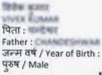

Region of intrest {} [[[ 44 235]]

 [[ 43 236]]

 [[ 43 420]]

 [[ 50 420]]

 [[ 50 393]]

 [[ 51 392]]

 [[201 392]]

 [[202 393]]

 [[202 395]]

 [[200 397]]

 [[169 397]]

 [[169 409]]

 [[171 411]]

 [[177 411]]

 [[178 412]]

 [[189 412]]

 [[190 411]]

 [[191 411]]

 [[192 412]]

 [[192 413]]

 [[198 413]]

 [[198 410]]

 [[199 409]]

 [[200 409]]

 [[201 410]]

 [[201 412]]

 [[212 412]]

 [[212 404]]

 [[213 403]]

 [[214 403]]

 [[214 397]]

 [[213 397]]

 [[212 396]]

 [[212 395]]

 [[210 393]]

 [[211 392]]

 [[257 392]]

 [[258 393]]

 [[257 394]]

 [[257 395]]

 [[255 397]]

 [[244 397]]

 [[244 401]]

 [[243 402]]

 [[243 409]]

 [[245 411]]

 [[251 411]]

 [[252 412]]

 [[263 412]]

 [[263 411]]

 [[264 410]]

 [[266 410]]

 [[267 411]]

 [[267 412]]

 [[273 412]]

 [[275 410]]

 [[276 411]]

 [[276 412]]

 [[282 412]]

 [[283 411]]

 [[284 412]]

 [[298 412]]

 [[298 406]]

 [[297 405]]

 [[298 404]]

 [[298 397]]

 [[272 397]]

 [[269 394]]

 [[267 394]]

 [[266 393]]


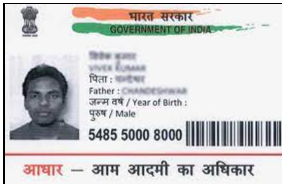

Region of intrest {} [[[ 42  32]]

 [[ 42  64]]

 [[ 41  65]]

 [[ 41  75]]

 [[ 42  76]]

 [[ 42  79]]

 [[ 41  80]]

 [[ 41  84]]

 [[ 42  85]]

 [[ 42  88]]

 [[ 41  89]]

 [[ 41 102]]

 [[ 42 103]]

 [[ 42 118]]

 [[ 41 119]]

 [[ 41 124]]

 [[ 42 125]]

 [[ 42 128]]

 [[ 41 129]]

 [[ 41 141]]

 [[ 42 142]]

 [[ 42 151]]

 [[ 41 152]]

 [[ 41 160]]

 [[ 42 161]]

 [[ 42 163]]

 [[ 41 164]]

 [[ 41 171]]

 [[ 42 172]]

 [[ 42 173]]

 [[ 41 174]]

 [[ 41 184]]

 [[ 42 185]]

 [[ 42 194]]

 [[ 41 195]]

 [[ 41 208]]

 [[ 42 209]]

 [[ 42 211]]

 [[ 44 211]]

 [[ 45 212]]

 [[ 49 212]]

 [[ 50 211]]

 [[143 211]]

 [[144 212]]

 [[154 212]]

 [[155 211]]

 [[191 211]]

 [[192 212]]

 [[197 212]]

 [[198 211]]

 [[261 211]]

 [[262 212]]

 [[271 212]]

 [[272 211]]

 [[274 211]]

 [[275 212]]

 [[280 212]]

 [[281 211]]

 [[300 211]]

 [[301 212]]

 [[309 212]]

 [[310 211]]

 [[318 211]]

 [[318 194]]

 [[319 193]]

 [[319 188]]

 [[318 187]]

 [[318 155]]

 [[319 154]]

 [[319 149]]


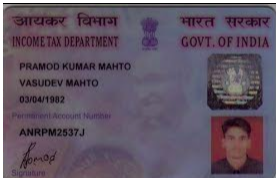

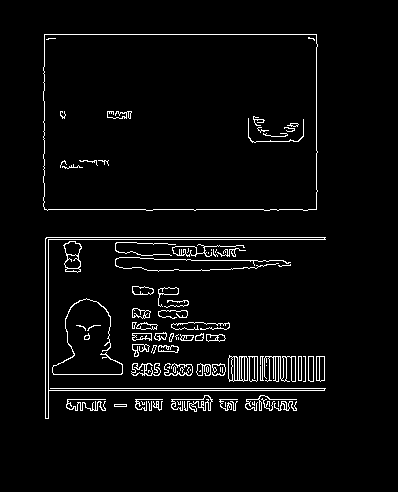

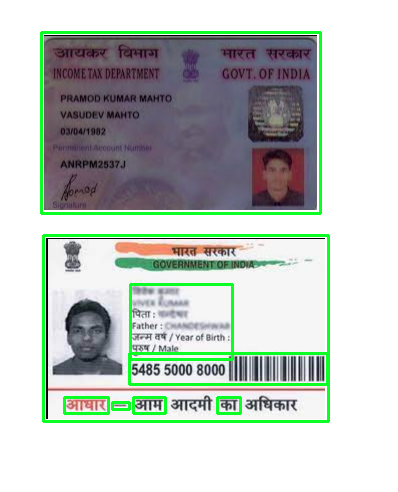

-1

In [6]:
image = cv2.imread("/content/drive/MyDrive/dataset/image2.png")
original = image.copy()
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
blurred = cv2.GaussianBlur(gray, (3, 3), 0)
canny = cv2.Canny(blurred, 120, 255, 1)
kernel = np.ones((5,5),np.uint8)
dilate = cv2.dilate(canny, kernel, iterations=1)
ROI_list = []

# Find contours
cnts = cv2.findContours(dilate, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
cnts = cnts[0] if len(cnts) == 2 else cnts[1]

# Iterate thorugh contours and filter for ROI
image_number = 0
for c in cnts:
    x,y,w,h = cv2.boundingRect(c)
    cv2.rectangle(image, (x, y), (x + w, y + h), (36,255,12), 2)
    print("Region of intrest {}",c)
    ROI = original[y:y+h, x:x+w]
    ROI_list.append(ROI)
    cv2_imshow(ROI)
    cv2.imwrite("/content/drive/MyDrive/dataset/object_detection/ROI_{}.png".format(image_number), ROI)
    image_number += 1

cv2_imshow(canny)
cv2_imshow(image)
cv2.waitKey(0)

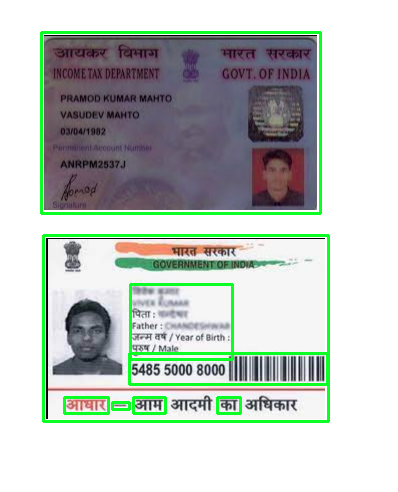

In [7]:
cv2_imshow(image)

Selecting top 2 biggest region of intrest

In [8]:

largest=sorted(ROI_list,key=len)[-2:]




0


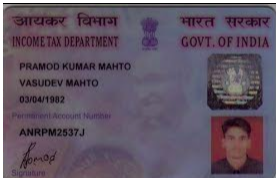

1


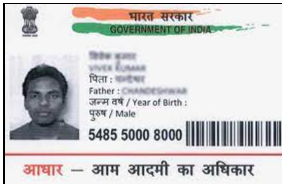

In [9]:
i=0
for img in largest:
  print(i)
  cv2_imshow(img)
  cv2.imwrite("/content/drive/MyDrive/dataset/object_detection/test_{}.png".format(i), img)
  i+=1

Installing fasiai library

In [10]:
!pip install -Uqq fastbook

     |████████████████████████████████| 720 kB 7.2 MB/s 
     |████████████████████████████████| 188 kB 15.1 MB/s 
     |████████████████████████████████| 46 kB 5.5 MB/s 
     |████████████████████████████████| 1.2 MB 23.1 MB/s 
     |████████████████████████████████| 54 kB 3.7 MB/s 
     |████████████████████████████████| 51 kB 398 kB/s 


In [11]:
import fastbook
fastbook.setup_book()

Mounted at /content/gdrive


In [12]:
from fastbook import *
from fastai.vision.widgets import *

In [84]:
# !fusermount -u drive
# !google-drive-ocamlfuse drive
#from google.colab import drive
#drive.mount('/content/drive')
#some time there is mount problem in google drive so used code to unmont remount


In [85]:
!ls "/content/drive/MyDrive/dataset/sample_pan_aadhar"




aadhar	pan


## Training and predicting region of intrest as pan or aadhar

In [15]:
dest = '/content/drive/MyDrive/dataset/sample_pan_aadhar/pan/sample11.png'

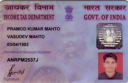

In [23]:
im = Image.open(dest)
im.to_thumb(128,128)

In [24]:
card_types = 'pan','aadhar'

In [25]:
path = Path('/content/drive/MyDrive/dataset/sample_pan_aadhar')

In [26]:
fns = get_image_files(path)
fns

(#15) [Path('/content/drive/MyDrive/dataset/sample_pan_aadhar/aadhar/sample1.png'),Path('/content/drive/MyDrive/dataset/sample_pan_aadhar/aadhar/sample2.png'),Path('/content/drive/MyDrive/dataset/sample_pan_aadhar/aadhar/sample3.png'),Path('/content/drive/MyDrive/dataset/sample_pan_aadhar/aadhar/sample4.png'),Path('/content/drive/MyDrive/dataset/sample_pan_aadhar/aadhar/sample5.png'),Path('/content/drive/MyDrive/dataset/sample_pan_aadhar/aadhar/sample6.png'),Path('/content/drive/MyDrive/dataset/sample_pan_aadhar/aadhar/sample7.png'),Path('/content/drive/MyDrive/dataset/sample_pan_aadhar/pan/sample11.png'),Path('/content/drive/MyDrive/dataset/sample_pan_aadhar/pan/sample12.png'),Path('/content/drive/MyDrive/dataset/sample_pan_aadhar/pan/sample13.png')...]

In [44]:
cards = DataBlock(
    blocks=(ImageBlock, CategoryBlock), 
    get_items=get_image_files, 
    splitter=RandomSplitter(valid_pct=0.2, seed=42),
    get_y=parent_label,
    item_tfms=Resize(128),
    batch_tfms=Resize(128)
    )

In [45]:
dls = cards.dataloaders(path,bs=2)

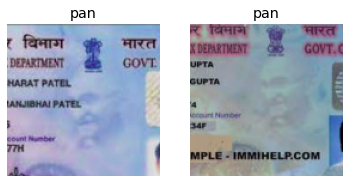

In [46]:
dls.valid.show_batch(max_n=3, nrows=1)

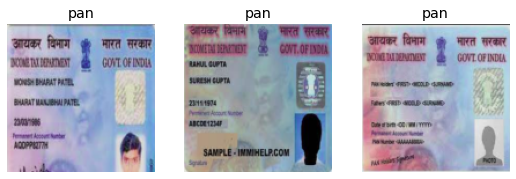

In [30]:
cards = cards.new(item_tfms=Resize(128, ResizeMethod.Squish))
dls = cards.dataloaders(path)
dls.valid.show_batch(max_n=4, nrows=1)

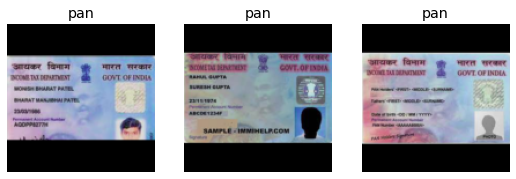

In [31]:
cards = cards.new(item_tfms=Resize(128, ResizeMethod.Pad, pad_mode='zeros'))
dls = cards.dataloaders(path)
dls.valid.show_batch(max_n=4, nrows=1)

Data augmentation refers to creating random variations of our input data, such that they appear different, but do not actually change the meaning of the data. Examples of common data augmentation techniques for images are rotation, flipping, perspective warping, brightness changes and contrast changes. For natural photo images such as the ones we are using here, a standard set of augmentations that we have found work pretty well are provided with the aug_transforms function. Because our images are now all the same size, we can apply these augmentations to an entire batch of them using the GPU, which will save a lot of time. To tell fastai we want to use these transforms on a batch, we use the batch_tfms parameter (note that we're not using RandomResizedCrop in this example, so you can see the differences more clearly; we're also using double the amount of augmentation compared to the default, for the same reason):

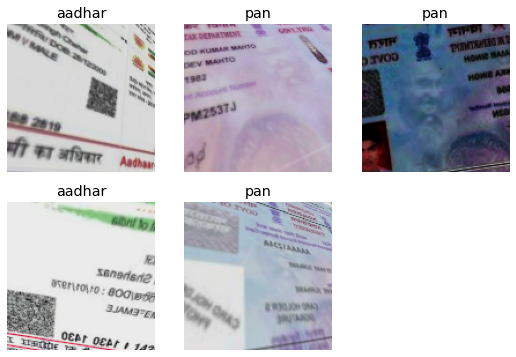

In [48]:

cards = cards.new(item_tfms=Resize(128), batch_tfms=aug_transforms(mult=2))
dls = cards.dataloaders(path,bs=5)
dls.train.show_batch(max_n=8, nrows=2)

In [53]:
cards = cards.new(
    item_tfms=RandomResizedCrop(224, min_scale=0.5),
    batch_tfms=aug_transforms())
dls = cards.dataloaders(path,bs=2)

## Training The Model

In [61]:
learn = cnn_learner(dls, resnet18, metrics=error_rate)
learn.fine_tune(2)

epoch,train_loss,valid_loss,error_rate,time
0,0.513654,0.448789,0.333333,00:00


epoch,train_loss,valid_loss,error_rate,time
0,0.867263,0.217559,0.000000,00:00
1,0.908526,0.250674,0.333333,00:00


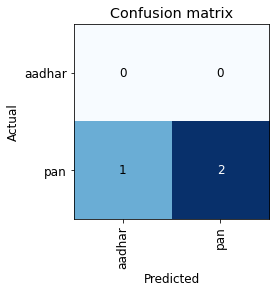

In [62]:
interp = ClassificationInterpretation.from_learner(learn)
interp.plot_confusion_matrix()

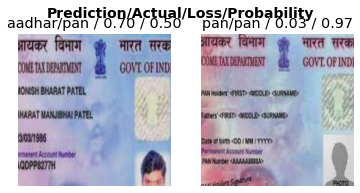

In [63]:
interp.plot_top_losses(2, nrows=1)

## Exporting the model

In [64]:
learn.export()

In [69]:
path = Path()
path.ls(file_exts='.pkl')

(#1) [Path('export.pkl')]

In [70]:
learn_inf = load_learner(path/'export.pkl')

In [71]:
learn_inf.dls.vocab

['aadhar', 'pan']

## Predictions

In [72]:
learn_inf.predict('/content/drive/MyDrive/dataset/sample_pan_aadhar/aadhar/sample1.png')

('aadhar', tensor(0), tensor([0.9736, 0.0264]))

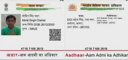

In [74]:
dest='/content/drive/MyDrive/dataset/sample_pan_aadhar/aadhar/sample1.png'
im = Image.open(dest)
im.to_thumb(128,128)


In [75]:
learn_inf.predict(dest)

('aadhar', tensor(0), tensor([0.9736, 0.0264]))

In [78]:
!ls /content/drive/MyDrive/dataset/object_detection

ROI_0.png  ROI_2.png  ROI_4.png  ROI_6.png  test_0.png	test_8.png
ROI_1.png  ROI_3.png  ROI_5.png  ROI_7.png  test_1.png


**test_0** and **test_1** contains the **region of intrest** extracted above. Now we will classify them as aadhar or pan because we do not know which region is aadhar or pan , location of aadhar and pan can change from sample to sample . 

In [81]:
predicted=learn_inf.predict('/content/drive/MyDrive/dataset/object_detection/test_0.png')

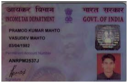

In [82]:

dest='/content/drive/MyDrive/dataset/object_detection/test_0.png'
im = Image.open(dest)
im.to_thumb(128,128)

In [80]:
learn_inf.predict('/content/drive/MyDrive/dataset/object_detection/test_1.png')

('aadhar', tensor(0), tensor([0.9100, 0.0900]))

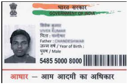

In [83]:
dest='/content/drive/MyDrive/dataset/object_detection/test_1.png'
im = Image.open(dest)
im.to_thumb(128,128)

So our classfier is properly able to predict aadar and pan  .

